In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare, chi2_contingency
import math

with open (r'/Users/suyashgoel/Downloads/bank+marketing/bank/bank-full.csv', 'r') as f:
    lines = f.readlines()
    data = [line.strip().split(';') for line in lines]

df = pd.DataFrame(data[1:], columns= data[0]).map(lambda x : x.replace('"', '') if isinstance (x, str) else x)

df.columns = [column.strip('"') for column in df.columns]

In [376]:
#converting numeric data

df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(int)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(int)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(int)
df['previous'] = df['previous'].astype(int)

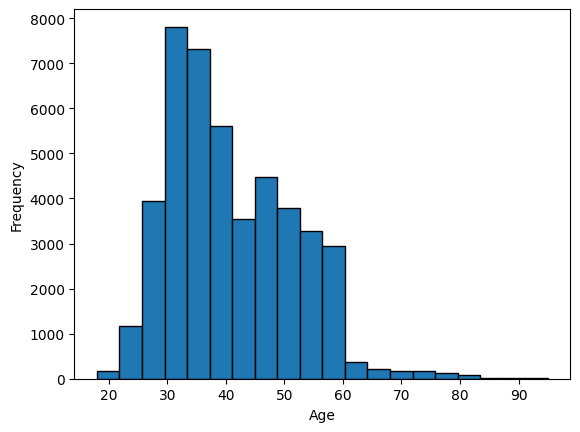

In [377]:
#numeric data visualization

plt.hist(df['age'], bins= 20, edgecolor= 'k', alpha = 1.0)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

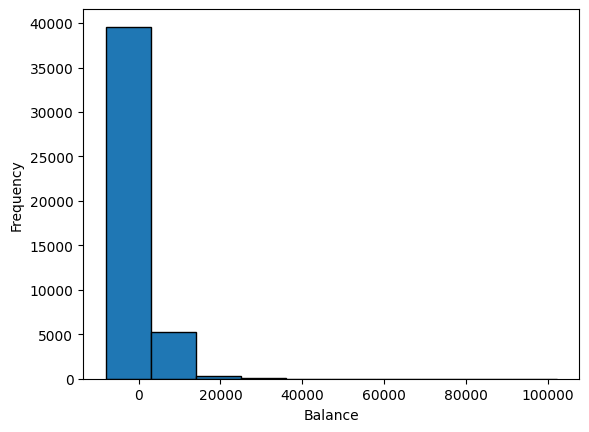

In [378]:
plt.hist(df['balance'], bins= 10, edgecolor= 'k', alpha = 1.0)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

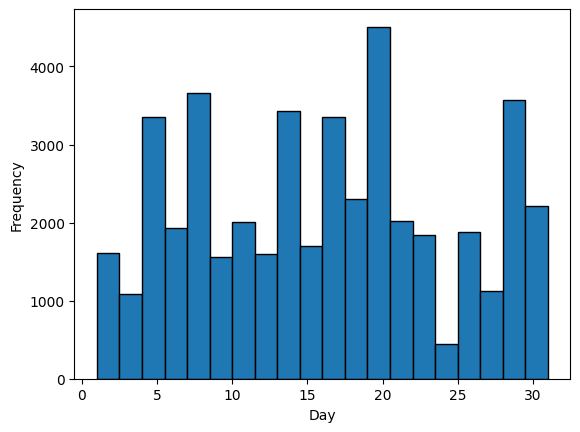

In [379]:
plt.hist(df['day'], bins= 20, edgecolor= 'k', alpha = 1.0)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

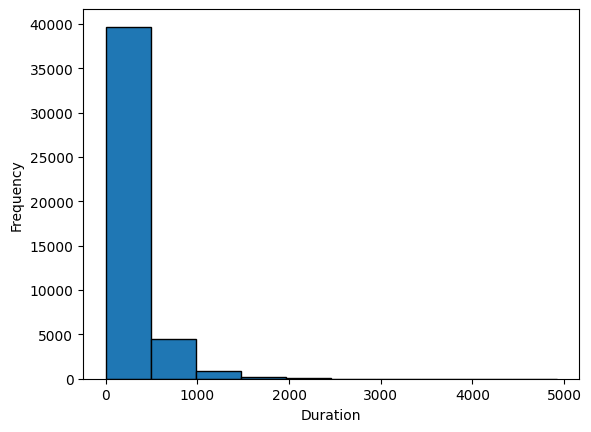

In [380]:
plt.hist(df['duration'], bins= 10, edgecolor= 'k', alpha = 1.0)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

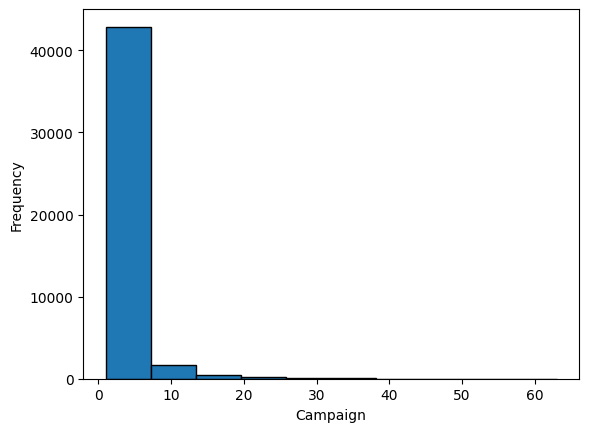

In [381]:
plt.hist(df['campaign'], bins= 10, edgecolor= 'k', alpha = 1.0)
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()

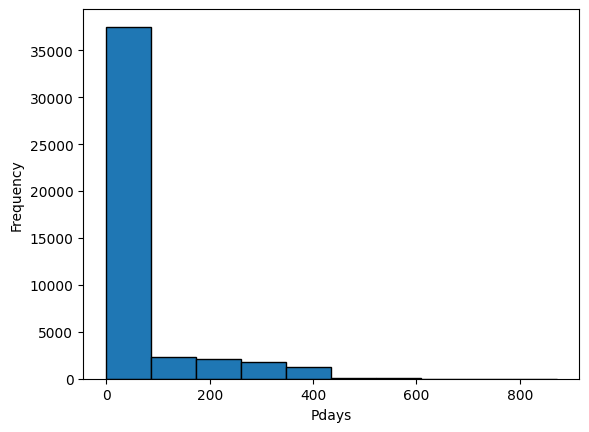

In [382]:
plt.hist(df['pdays'], bins= 10, edgecolor= 'k', alpha = 1.0)
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.show()

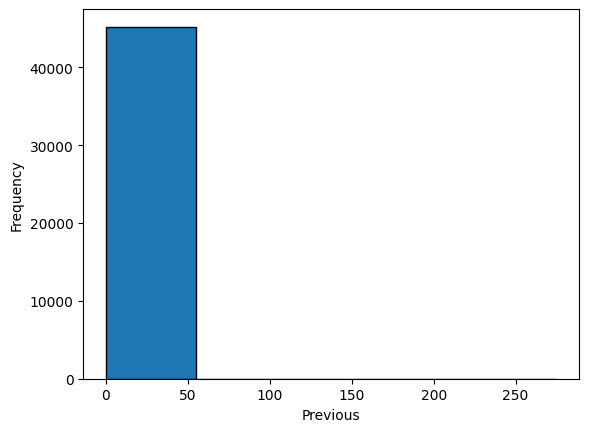

In [383]:
plt.hist(df['previous'], bins= 5, edgecolor= 'k', alpha = 1.0)
plt.xlabel('Previous')
plt.ylabel('Frequency')
plt.show()

In [384]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


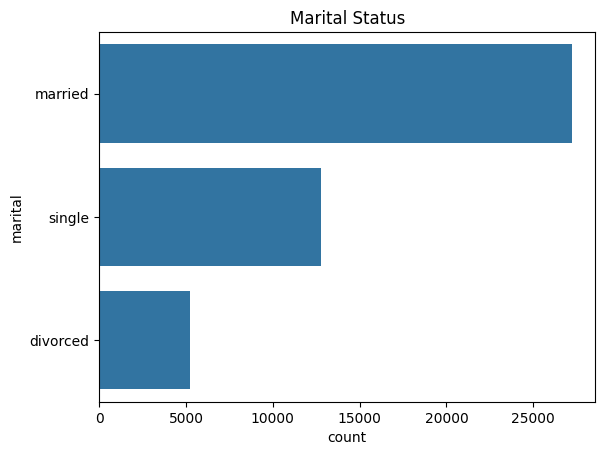

In [385]:
#categorical data visualization

sns.countplot(df['marital'])
plt.title('Marital Status')
plt.show()

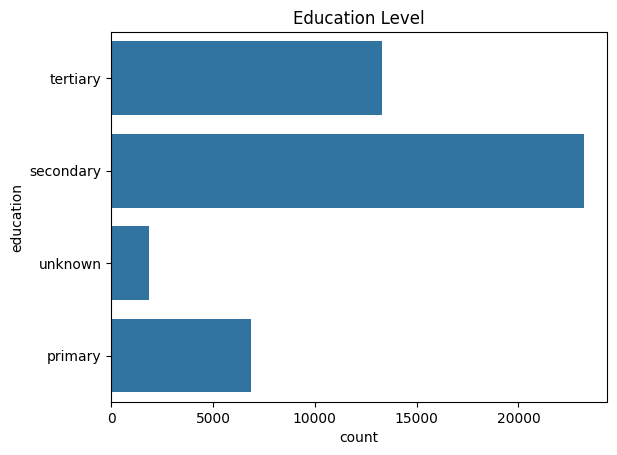

In [386]:
sns.countplot(df['education'])
plt.title('Education Level')
plt.show()

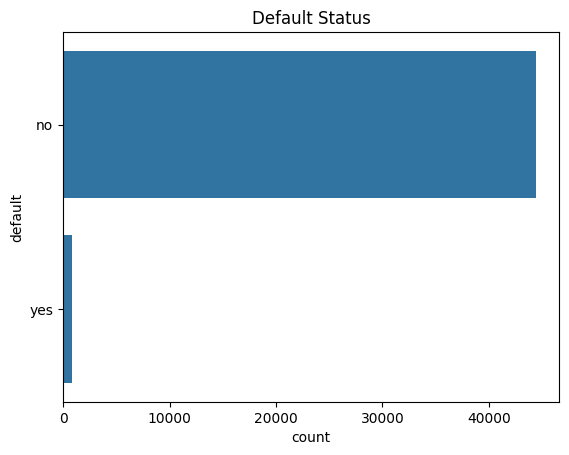

In [387]:
sns.countplot(df['default'])
plt.title('Default Status')
plt.show()

In [388]:
from sklearn.utils import resample

df_majority_1 = df[(df['default']=='no')]
df_minority_1 = df[(df['default']=='yes')]

print(df['default'].value_counts())

df_minority_upsampled_1 = resample(df_minority_1, replace=True, n_samples= 44396, random_state=1)

df_default_upsampled_1 = pd.concat([df_majority_1,  df_minority_upsampled_1])

default
no     44396
yes      815
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='default'>

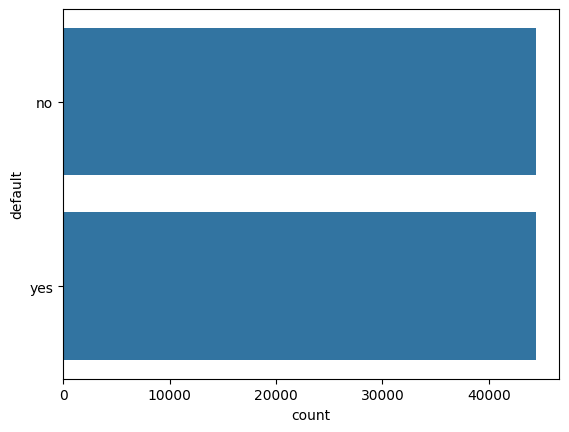

In [389]:
df = df.drop(['default'], axis=1)
df = pd.concat([df, df_default_upsampled_1])

sns.countplot(df['default'])

<Axes: xlabel='count', ylabel='housing'>

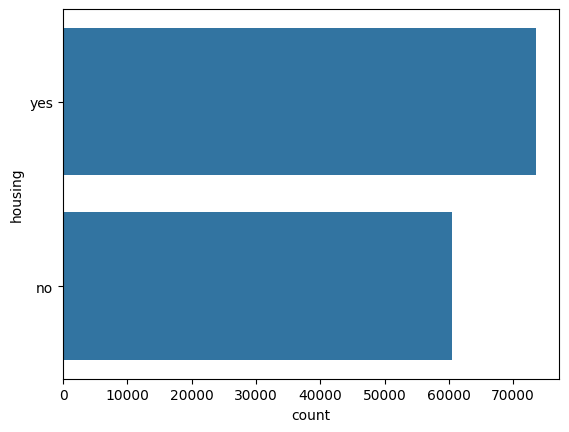

In [390]:
sns.countplot(df['housing'])

<Axes: xlabel='count', ylabel='loan'>

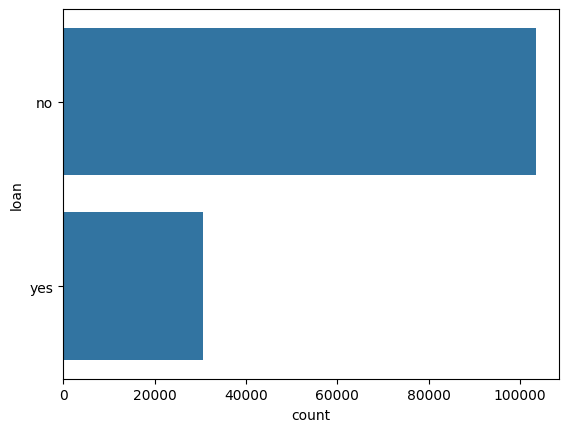

In [391]:
sns.countplot(df['loan'])

<Axes: xlabel='count', ylabel='contact'>

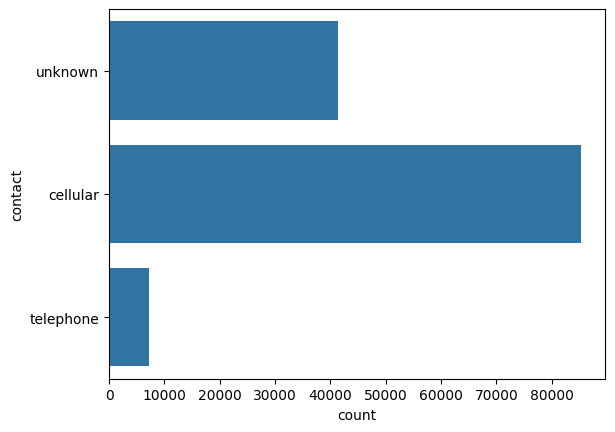

In [392]:
sns.countplot(df['contact'])

<Axes: xlabel='count', ylabel='month'>

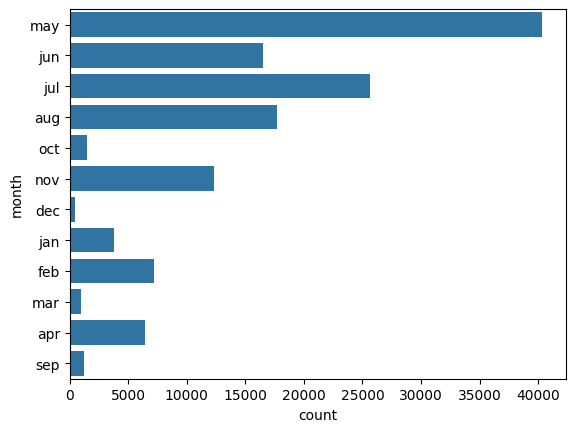

In [393]:
sns.countplot(df['month'])

<Axes: >

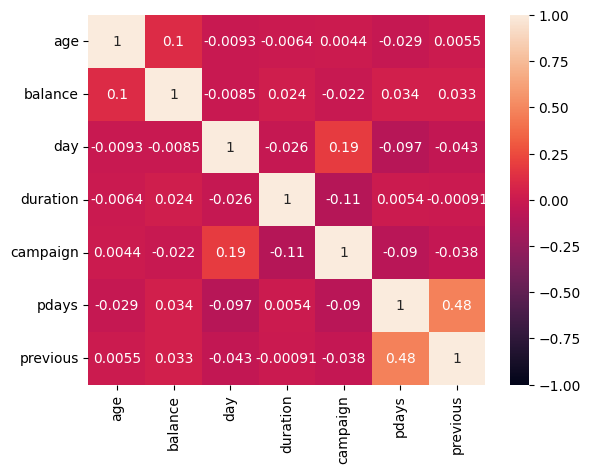

In [394]:
sns.heatmap(df.select_dtypes(include=['int']).corr(), vmin = -1, vmax = 1, annot= True)

In [395]:
# drop moderately correlated numeric variables

#df = df.drop(['pdays'], axis = 1)

# model performs better when variable not dropped

<Axes: >

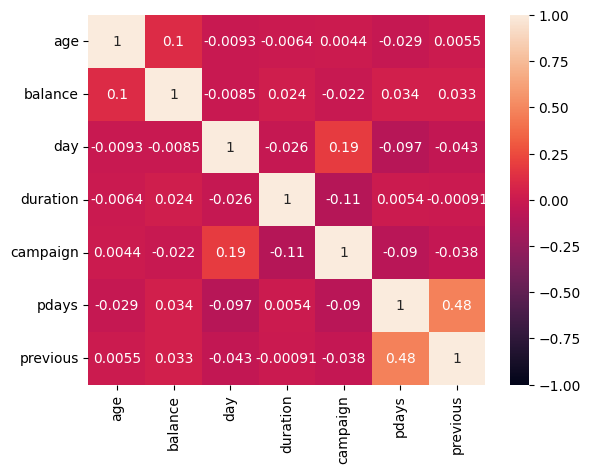

In [396]:
sns.heatmap(df.select_dtypes(include=['int']).corr(), vmin = -1, vmax = 1, annot= True)

In [397]:
#cramers v for categorical variables

def cramers(df):
    num_cols = df.shape[1]
    cramer_matrix = np.zeros((num_cols, num_cols))
    for cat1 in range(num_cols):
        for cat2 in range(num_cols):
            ct = pd.crosstab(df[df.columns[cat1]], df[df.columns[cat2]])
            c, p, dof, expected = chi2_contingency(ct) 
            n = sum(np.sum(ct))
            k = min(ct.shape)
            cramer_matrix[cat1, cat2] = math.sqrt(c / (n * k))
    cramer_matrix = pd.DataFrame(cramer_matrix, columns=df.columns, index=df.columns)
    return cramer_matrix

<Axes: >

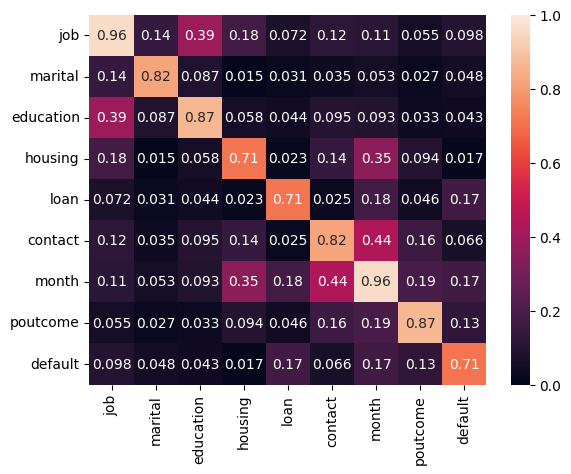

In [398]:
cat_var = df.select_dtypes('object')
cat_var.drop(columns=['y'], inplace=True)

sns.heatmap(cramers(cat_var), vmin = 0, vmax = 1, annot= True)

In [399]:
# drop moderately correlated categorical variables

#df = df.drop(['education'], axis = 1)
#df = df.drop(['month'], axis = 1)

# model performs better when variables not dropped

In [400]:
cat_var = df.select_dtypes('object')
cat_var.drop(columns=['y'], inplace=True)

In [401]:
#one hot encoding

dummy_features = pd.get_dummies(cat_var, drop_first=True)
print(dummy_features.columns)

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes'],
      dtype='object')


In [402]:
#dataframe updated with one hot encoded variables

df = pd.concat([df, dummy_features], axis = 1)
df.drop(cat_var, axis= 1, inplace= True)


In [403]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [404]:
#split into testing and training data; train model; compute accuracy

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['y']), df['y'], test_size=0.2)

logisticReg = LogisticRegression(solver='newton-cg')
logisticReg.fit(X_train, y_train)

prediction = logisticReg.predict(X_test)
accuracy = logisticReg.score(X_test, y_test)
print(accuracy)


0.9153016678482147


In [405]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logisticReg.predict(X_test)))

#accuracy gives % of correct predictions
#precision gives % of correct predictions for each class, or what percent of predicitions are true positives (see how good model is on minority class)
#recall gives % of instances of class captured by model
#f1-score gives balance of precision and recall

              precision    recall  f1-score   support

          no       0.93      0.98      0.95     24201
         yes       0.62      0.33      0.43      2600

    accuracy                           0.92     26801
   macro avg       0.77      0.66      0.69     26801
weighted avg       0.90      0.92      0.90     26801



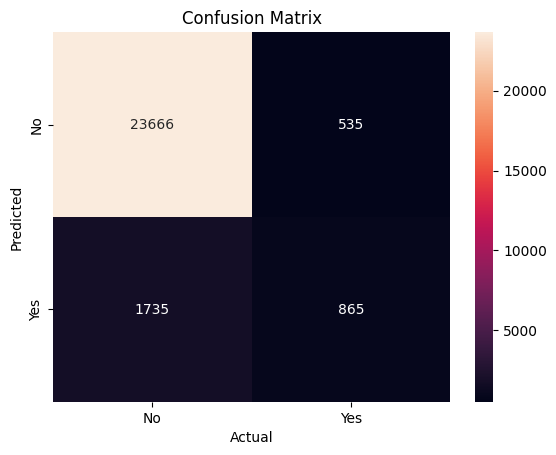

In [406]:
cm = confusion_matrix(y_test,prediction)
cm = pd.DataFrame(cm, index=['No', 'Yes'], columns=['No', 'Yes'])

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

In [407]:
import shap



explainer = shap.Explainer(logisticReg, X_train)

shap_values = explainer(X_test)



TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

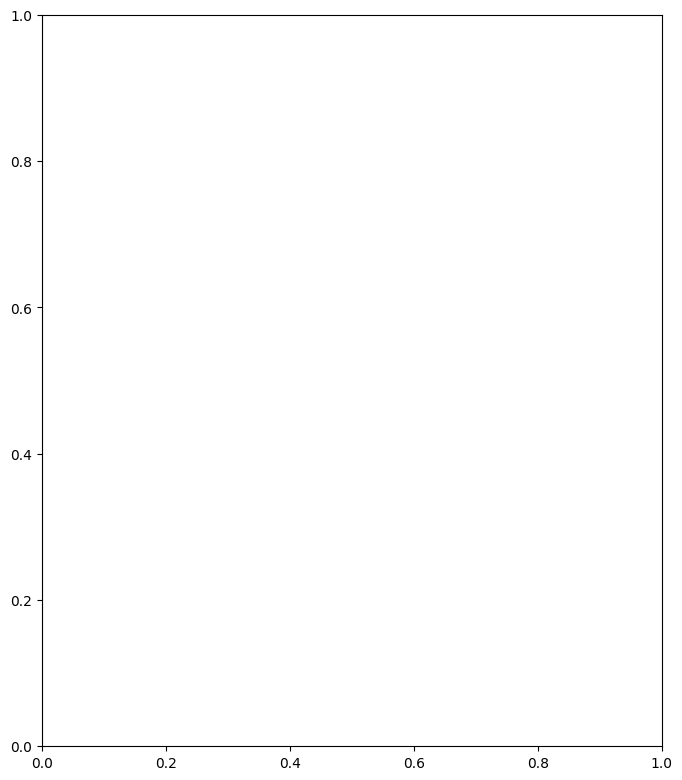

In [408]:
shap.summary_plot(shap_values, X_test)
